# Prepare openai appkey and milvus server

😎😎😎😎😎😎😎😎😎😎😎

In [1]:
//Open API Key
string openAIAppKey = "OpenAI API Key";

//Milvus configuration
string milvusEndpoint = "Milvus server";
int milvusPort = 19535;
string milvusUserName = "db_admin";
string milvusPassword = "{Milvus password}";

# Add nuget package

[OpenAI-API-dotnet](https://github.com/OkGoDoIt/OpenAI-API-dotnet)

[Milvus-c#-sdk]()


In [2]:
#r "nuget: OpenAI, 1.7.2"
#r "nuget: Milvus.Client, 2.2.1-alpha.4"

Installed Packages Milvus.Client, 2.2.1-alpha.4 OpenAI, 1.7.2

# Connect to OPenAI and Milvus

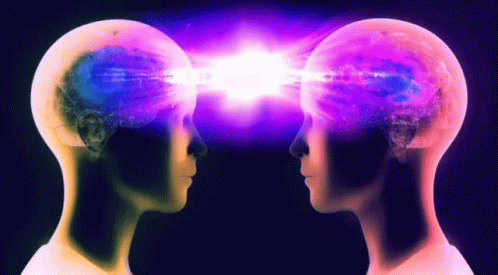

In [3]:
using Milvus.Client;

//init openai client
var api = new OpenAI_API.OpenAIAPI(openAIAppKey);
var result = await api.Completions.GetCompletion("Hi");
Console.WriteLine(result);

//init milvus client
var milvusClient = new Milvus.Client.Client.gRPC.MilvusGrpcClient(milvusEndpoint, milvusPort, milvusUserName, milvusPassword);
MilvusHealthState healthState = await milvusClient.HealthAsync(default);

healthState

,

I am writing down to know about the state of art technology for


IsHealthy,True
ErrorMsg,
ErrorCode,Success


# Create embedding

In [6]:
string embeddingText = "Hello milvus";
var embedding = await api.Embeddings.CreateEmbeddingAsync(embeddingText);
Console.WriteLine("Dimension: {0}", embedding.Data[0].Embedding.Count());
embedding

Dimension: 1536


OpenAI_API.Embedding.EmbeddingResult Data index value 0 OpenAI_API.Embedding.Data Object embedding Embedding [ -0.009175871, -0.011633693, -0.0143274665, -0.032036897, -0.045958005, 0.02371307, -0.02111761, -0.0143274665, -0.011076586, -0.007878141, 0.026872193, 0.0016369098, -0.002561051, -0.0098771695, -0.0013378747, -0.0015205728, 0.03591698, -0.0021120887, 0.034343973, -0.009844398 ... (1516 more) ] Index 0 Usage OpenAI_API.Usage PromptTokens 4 TotalTokens 4 Created <null> CreatedUnixTime <null> Model OpenAI_API.Models.Model ModelID text-embedding-ada-002-v2 OwnedBy <null> Object <null> Created <null> CreatedUnixTime <null> Permission Root <null> Parent <null> Object list Organization user-lohcplnwxs4nzexssg1dzgq3 ProcessingTime 00:00:00.0220000 RequestId 115ad340514755cf25fcabdeda72826b OpenaiVersion 2020-10-01

# Create Milvus Collection and insert embeddings to milvus.

🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱

In [7]:
string collectionName = "OpenAICollection";

//Check if collection exists
bool hasCollection = await milvusClient.HasCollectionAsync(collectionName);

//Drop collection if needed
if(hasCollection){
    await milvusClient.DropCollectionAsync(collectionName);
    hasCollection = false;
}

//Create collection if not exists
if(!hasCollection){
    await milvusClient.CreateCollectionAsync(collectionName,
        new FieldType[]{
            FieldType.CreateVarchar("Id",maxLength:150,isPrimaryKey:true),
            FieldType.CreateVarchar("Text",maxLength: 4000),
            FieldType.CreateFloatVector("Embedding",1536)
        });
}

//Insert data
await milvusClient.InsertAsync(collectionName,
    new Field[]{
        Field.Create<string>("Id",new []{Guid.NewGuid().ToString()}),
        Field.Create<string>("Text", new []{embeddingText}),
        Field.CreateFloatVector("Embedding", new List<List<float>>(){ embedding.Data[0].Embedding.ToList()}),
    }
);

# Insert more messages to milvus

In [8]:
List<string> moreAboutMe = new List<string>(){
    "I currently work in the hotel industry at the front desk. I won the best team player award.",
    "I have worked as a tourist operator for 8 years. I have also worked as a banking associate for 3 years.",
    "My new dog Trixie is the cutest thing you've ever seen. She's just 2 years old.",
    "Can you believe the size of the trees in Yellowstone? They're huge! I'm so committed to forestry concerns."
};

List<OpenAI_API.Embedding.EmbeddingResult> embeddings = new ();
foreach(var msg in moreAboutMe){
    var embedding = await api.Embeddings.CreateEmbeddingAsync(msg);
    embeddings.Add(embedding);
}

await milvusClient.InsertAsync(collectionName,
    new Field[]{
        Field.Create<string>("Id",embeddings.Select(p => Guid.NewGuid().ToString()).ToList()),
        Field.Create<string>("Text", moreAboutMe),
        Field.CreateFloatVector("Embedding", embeddings.Select(e => e.Data[0].Embedding.ToList()).ToList()),
    }
);

Console.WriteLine("Four GIGANTIC vectors were generated just now from those 4 pieces of text above.");


Four GIGANTIC vectors were generated just now from those 4 pieces of text above.
